In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', rc={
    'xtick.bottom': True,
    'ytick.left': True,
})
tab10_colors = sns.color_palette("tab10")

This notebook generates the plots in **Figure 2** of the paper which show the distribution of inter-token times for EHR OMOP.

In [2]:
input_parquet_path = '/share/pi/nigam/mwornow/ehrshot-benchmark/ehrshot/eda/df__starr__inter_event_times.parquet'

# Load the Parquet file
df = pd.read_parquet(input_parquet_path)

# Group by 'pid' to calculate the mean and standard deviation of time between events for each patient
df_grouped = df.groupby('pid').agg({'time': ['mean', 'std', lambda x: np.percentile(x, 75) - np.percentile(x, 25)]}).reset_index()
df_grouped.columns = ['pid', 'mean_time_between_events', 'std_time_between_events', 'iqr_time_between_events']

/home/mwornow/llama_hf_env/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mwornow/llama_hf_env/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mwornow/llama_hf_env/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


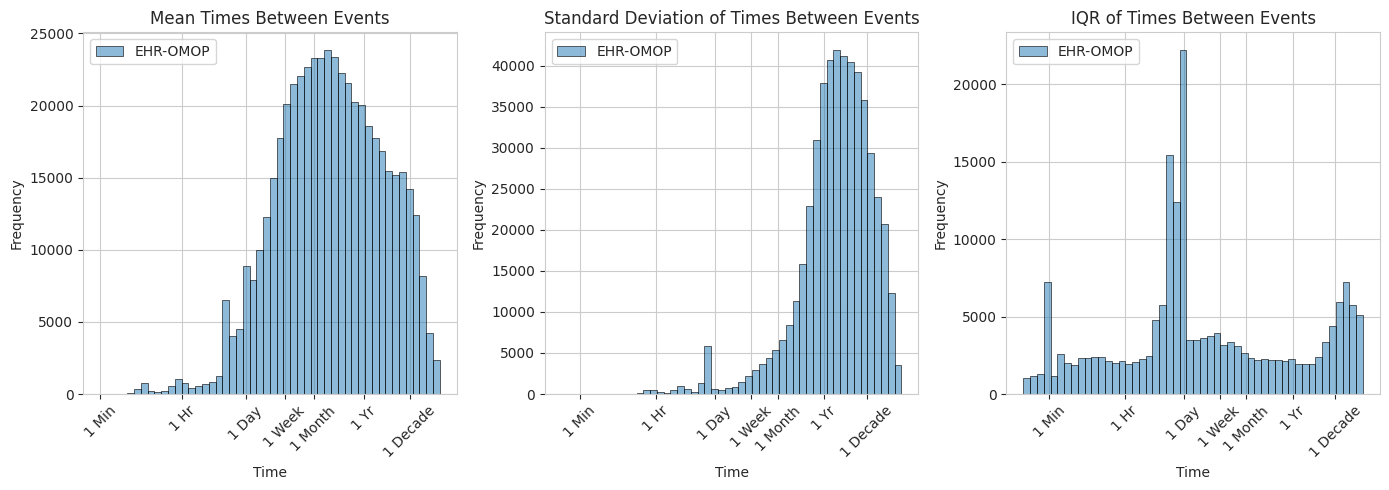

In [25]:
is_show_nlp_plot: bool = False

# Make plot
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Bar height (maximum frequency) for visual alignment
bar_height_mean = 25000
bar_height_std = 40000
bar_height_iqr = 20000

# Define consistent width relative to log scale
relative_width = 0.02  # Adjust this to get the desired visual width

# Plot 1: Histogram of mean times between events across all patients
sns.histplot(df_grouped['mean_time_between_events'], bins=50, kde=True, log_scale=(True, False), ax=axes[0], edgecolor='black', color=tab10_colors[0], label='EHR-OMOP')
axes[0].set_title('Mean Times Between Events')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot 2: Histogram of standard deviation of time btwn events within each patient
sns.histplot(df_grouped['std_time_between_events'], bins=50, kde=True, log_scale=(True, False), ax=axes[1], edgecolor='black', color=tab10_colors[0], label='EHR-OMOP')
axes[1].set_title('Standard Deviation of Times Between Events')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Plot 3: Histogram of IQR of Time within each patient
sns.histplot(df_grouped['iqr_time_between_events'], bins=50, kde=True, log_scale=(True, False), ax=axes[2], edgecolor='black', color=tab10_colors[0], label='EHR-OMOP')
axes[2].set_title('IQR of Times Between Events')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)


if is_show_nlp_plot:
    # Add NLP mean time overlay (a red bar at mean = 1)
    axes[0].bar(x=1, height=bar_height_mean, width=1 * relative_width, color='red', label='NLP Mean Time = 1')
    # Add NLP std deviation overlay (a red bar close to zero, at x = 1e-2)
    axes[1].bar(x=1e-2, height=bar_height_std, width=1e-2 * relative_width, color='orange', label='NLP Std Dev ≈ 0')
    # Add NLP IQR overlay (a red bar close to zero, at x = 1e-2)
    axes[2].bar(x=1e-2, height=bar_height_iqr, width=1e-2 * relative_width, color='red', label='NLP IQR ≈ 0')
    
# Define human-readable time labels
time_labels = ['1 Min', '1 Hr', '1 Day', '1 Week', '1 Month', '1 Yr', '1 Decade']
time_values = [60, 60 * 60, 60 * 60 * 24, 60 * 60 * 24 * 7, 60 * 60 * 24 * 30,  60 * 60 * 24 * 365, 60 * 60 * 24 * 365 * 10,]  # Corresponding time values in seconds

# Set custom x-ticks and labels for each axis
for i in range(len(axes)):
    axes[i].set_xscale('log')
    axes[i].set_xticks(time_values)
    axes[i].set_xticklabels(time_labels)
    axes[i].legend(loc='upper left')
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].get_xaxis().set_minor_locator(plt.NullLocator())  # Hide minor ticks

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('plots/val-stats-irr.png')
plt.show()